## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_context("paper",  font_scale=1.2)

In [2]:
dataFrame = pd.read_csv("bank-additional-full.csv", sep=";")
print(dataFrame.info())
print("\n","Розмірність датасету:", dataFrame.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [3]:
bank_target = dataFrame['y']
bank_target.replace(['no','yes'],[0, 1], inplace = True)
print(bank_target)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [4]:
dataFrame.head()
bank_client = dataFrame[['age', 'job', 'default', 'marital', 'housing', 'loan', 'education']]
print(bank_client)

       age          job  default  marital housing loan            education
0       56    housemaid       no  married      no   no             basic.4y
1       57     services  unknown  married      no   no          high.school
2       37     services       no  married     yes   no          high.school
3       40       admin.       no  married      no   no             basic.6y
4       56     services       no  married      no  yes          high.school
...    ...          ...      ...      ...     ...  ...                  ...
41183   73      retired       no  married     yes   no  professional.course
41184   46  blue-collar       no  married      no   no  professional.course
41185   56      retired       no  married     yes   no    university.degree
41186   44   technician       no  married      no   no  professional.course
41187   74      retired       no  married     yes   no  professional.course

[41188 rows x 7 columns]


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

17 98 0


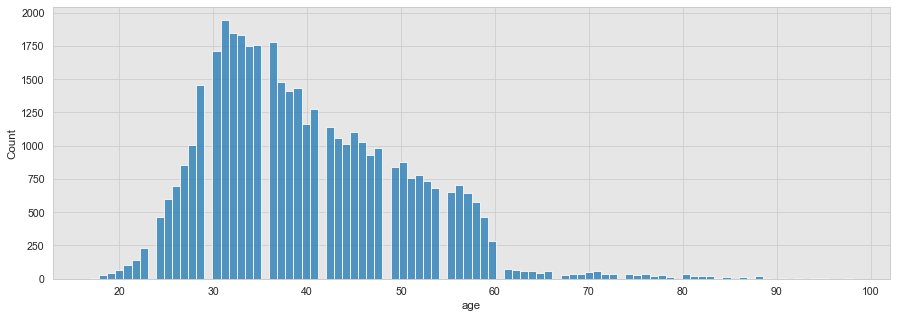

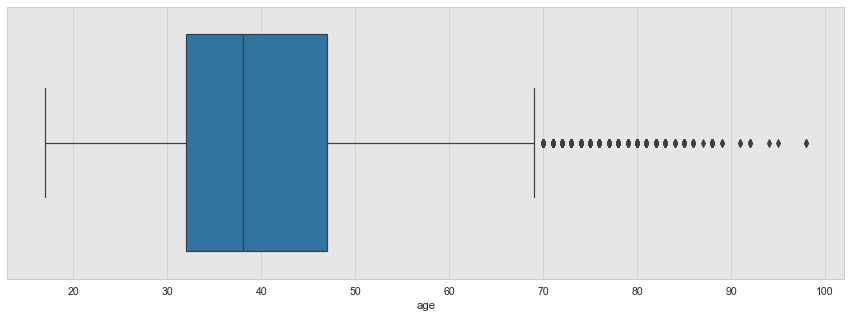

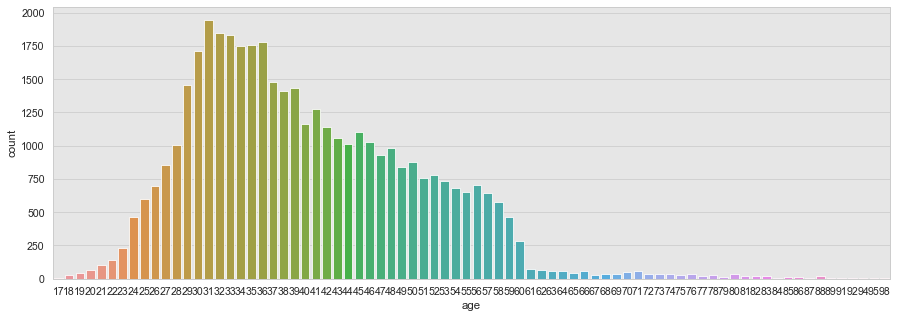

In [5]:
ages = dataFrame["age"]
print(ages.min(), ages.max(), ages.isna().sum())

plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "age")
plt.show()

plt.figure(figsize = (15, 5))
sns.boxplot(x = dataFrame["age"])
plt.show()

plt.figure(figsize = (15, 5))
sns.countplot(x = "age", data = dataFrame)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Підготував датасет, вивів основні дані.
2. Підготуував цільову змінну.
3. Виділив 'age', 'job', 'default', 'marital', 'housing', 'loan', 'education', бо саме ці змінні характеризують клієнта.
4. Мінімальний вік - 17, максимальний - 98, кількість пропусків - 0. Основна масса клієнтів мають від 24 до 59р.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [6]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 - 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [7]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 14.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,default,marital,housing,loan,education
0,56,housemaid,no,married,no,no,basic.4y
1,57,services,unknown,married,no,no,high.school
2,37,services,no,married,yes,no,high.school
3,40,admin.,no,married,no,no,basic.6y
4,56,services,no,married,no,yes,high.school
...,...,...,...,...,...,...,...
41183,73,retired,no,married,yes,no,professional.course
41184,46,blue-collar,no,married,no,no,professional.course
41185,56,retired,no,married,yes,no,university.degree
41186,44,technician,no,married,no,no,professional.course


**Висновки з завдання 5 (детальні)**

1. Атрибут Age має нижній хвіст 28% від всієї вибірки і верхній 55%
2. Міжквартильна відстань - 27%
3. Нижня межа -12.5, а верхня 14.5

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

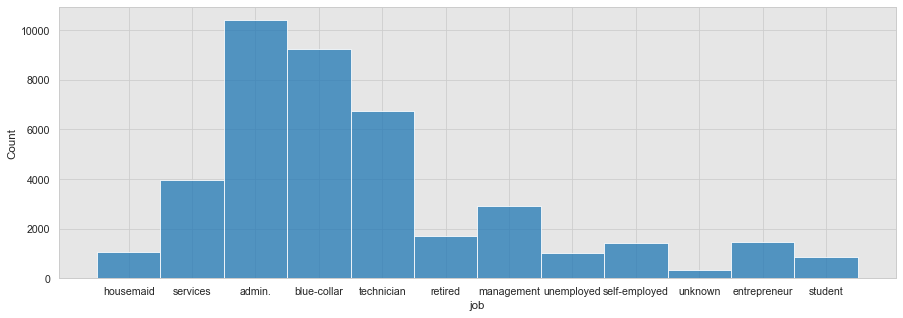

In [8]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "job")
plt.show()

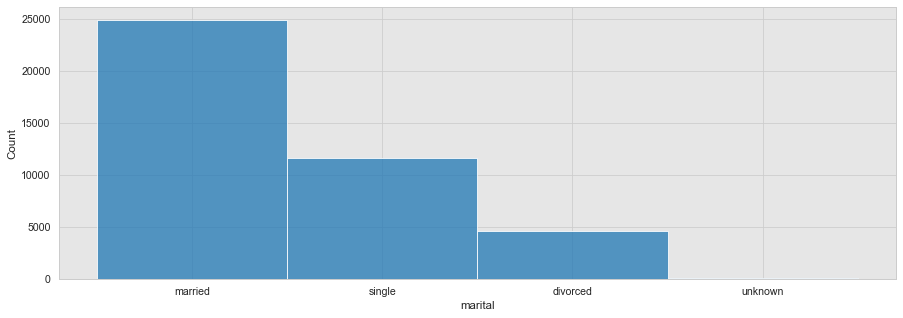

In [9]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "marital")
plt.show()

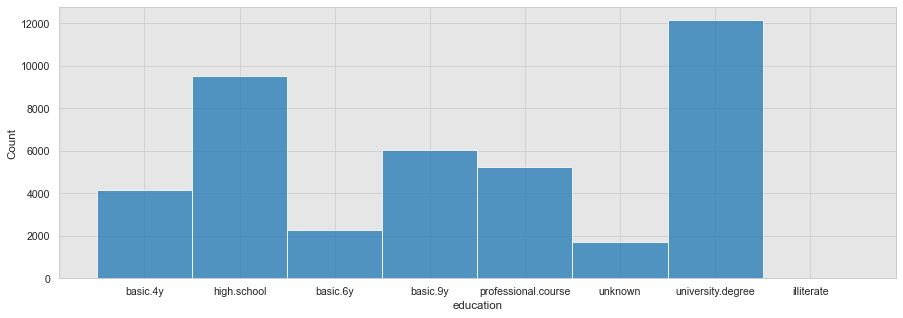

In [10]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "education")
plt.show()

**Висновки з завдання 6 (детальні)**

1. Найбільше - admin, blue-collar, technician. Найменше - unknown.
2. Найбільше - одружених, найменше -  розведених.
3. Найбільше тих, хто закінчив школу і університет, найменше unknown і тих, хто закінчив 6 клас.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

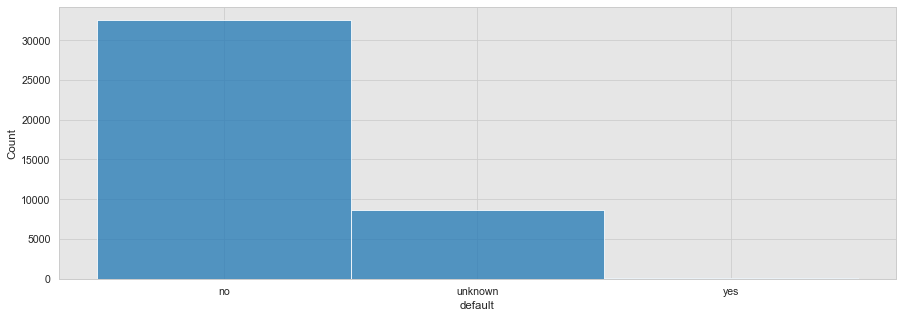

In [11]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "default")
plt.show()

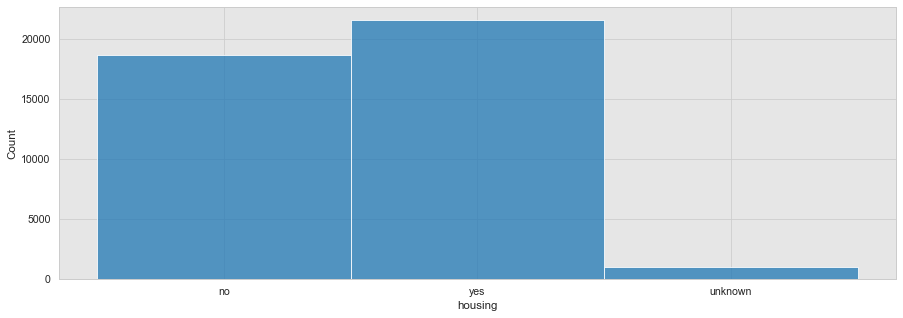

In [12]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "housing")
plt.show()

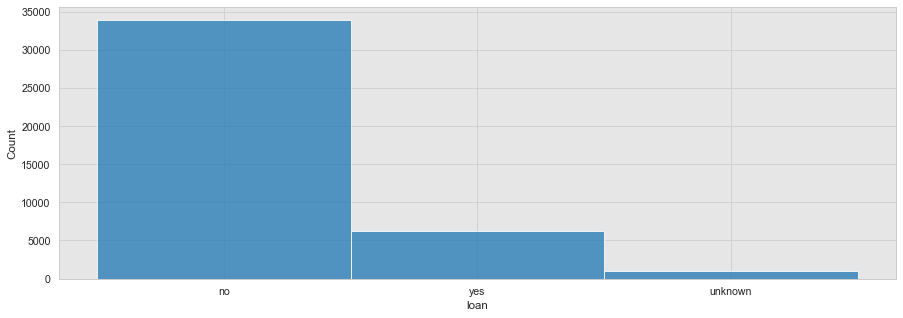

In [13]:
plt.figure(figsize = (15, 5))
sns.histplot(data = dataFrame, x = "loan")
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [14]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(df[col])
      
    return df

In [15]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [16]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column

    df: pd.DataFrame to encode
    age_col: age col to encode 
    """
#     le = LabelEncoder()
#     not_null = dataframe[age_col][dataframe[age_col].notnull()]
#     dataframe[age_col] = le.fit_transform(dataframe[age_col])

    dataframe[age_col] = pd.qcut(dataframe.age, 4, labels=['1','2','3','4'])
    
    return dataframe

In [17]:
bank_client = encode_age(bank_client, 'age')
print(bank_client['age'])

0        4
1        4
2        2
3        3
4        4
        ..
41183    4
41184    3
41185    4
41186    3
41187    4
Name: age, Length: 41188, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']


**Висновки з завдання 9 (детальні)**

1 - до 33, 2 - від 33 до 38, 3 - від 39 до 47, 4 - від 48


## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [18]:
bank_relat = dataFrame[['contact', 'month', 'day_of_week', 'duration']]
print(bank_relat.isna().sum())

contact        0
month          0
day_of_week    0
duration       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [19]:
print(bank_relat.contact.unique())
print(bank_relat.month.unique())
print(bank_relat.day_of_week.unique())

['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



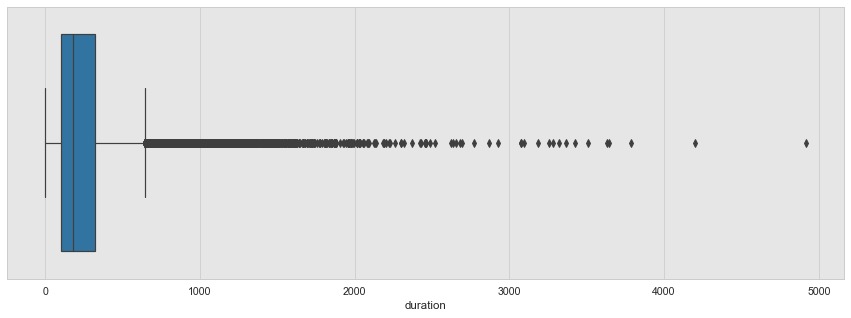

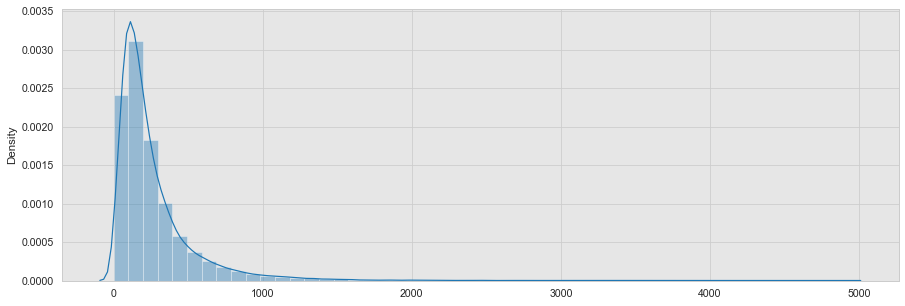

In [20]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = bank_relat, x="duration")
plt.show()

plt.figure(figsize = (15, 5))
sns.distplot(x = bank_relat["duration"])
plt.show()

Важкий хвіст з правої сторони від ~2000

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [21]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [22]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    dataframe[duration_col] = pd.qcut(dataframe[duration_col], 5, labels=['1','2','3','4', '5'])
    return dataframe

In [23]:
bank_relat = encode_duration(bank_relat, 'duration')
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,4
1,1,6,1,3
2,1,6,1,4
3,1,6,1,3
4,1,6,1,4
...,...,...,...,...
41183,0,7,0,4
41184,0,7,0,5
41185,0,7,0,3
41186,0,7,0,5


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [24]:
bank_socec = dataFrame[['job', 'marital', 'education', 'default', 'housing', 'loan']]

**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [25]:
bank_other = dataFrame[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [26]:
bank_other = encode_categorical_columns(bank_other, ['poutcome'])
print(bank_other.tail())

       campaign  pdays  previous  poutcome
41183         1    999         0         1
41184         1    999         0         1
41185         2    999         0         1
41186         1    999         0         1
41187         3    999         1         0


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [27]:
bank_final = pd.concat([bank_other, bank_relat, bank_client], axis = 1)
print(bank_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   campaign     41188 non-null  int64   
 1   pdays        41188 non-null  int64   
 2   previous     41188 non-null  int64   
 3   poutcome     41188 non-null  int32   
 4   contact      41188 non-null  int32   
 5   month        41188 non-null  int32   
 6   day_of_week  41188 non-null  int32   
 7   duration     41188 non-null  category
 8   age          41188 non-null  category
 9   job          41188 non-null  int32   
 10  default      41188 non-null  int32   
 11  marital      41188 non-null  int32   
 12  housing      41188 non-null  int32   
 13  loan         41188 non-null  int32   
 14  education    41188 non-null  int32   
dtypes: category(2), int32(10), int64(3)
memory usage: 2.6 MB
None


**Завдання 19** Провести ділення вибірки

In [28]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [29]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target, 0.2, 10, 101)

In [30]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    return X_train, X_test

In [31]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [32]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7235   44]
 [ 799  160]]
90.0


## k-NN

k=1 86.04 (+/- 0.64)
k=2 88.91 (+/- 0.61)
k=3 88.39 (+/- 0.64)
k=4 89.44 (+/- 0.55)
k=5 89.31 (+/- 0.66)
k=6 89.66 (+/- 0.60)
k=7 89.54 (+/- 0.67)
k=8 89.80 (+/- 0.66)
k=9 89.74 (+/- 0.67)
k=10 89.82 (+/- 0.64)
k=11 89.86 (+/- 0.65)
k=12 89.92 (+/- 0.67)
k=13 89.88 (+/- 0.68)
k=14 89.96 (+/- 0.70)
k=15 89.97 (+/- 0.68)
k=16 89.95 (+/- 0.66)
k=17 89.98 (+/- 0.68)
k=18 89.99 (+/- 0.70)
k=19 90.00 (+/- 0.71)
k=20 90.01 (+/- 0.69)
k=21 90.02 (+/- 0.73)
k=22 90.00 (+/- 0.72)
k=23 90.05 (+/- 0.72)
k=24 90.02 (+/- 0.69)
k=25 90.03 (+/- 0.72)
The optimal number of neighbors is 22 with 90.1%


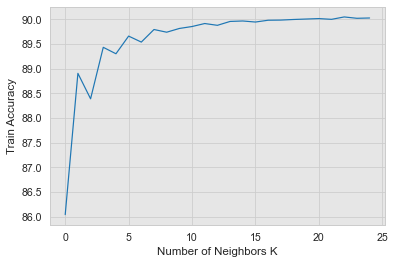

In [33]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7223   56]
 [ 780  179]]
90.0


## Логістична Регресія

In [35]:
models = pd.DataFrame({
                'Models': ['k-NN', 'Логістична Регресія'],
                'Score':  [KNNCV, LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,Логістична Регресія,0.899372
0,k-NN,0.896579


**Висновки по моделям (детальні)**

Точність моделей ~90%, оптимальна кількість сусідів - 20.